# Ex1

In [1]:
set.seed(1234)
x <- c(15.58,15.9,16,16.1,16.2)
p1 <- c(0.15,0.21,0.35,0.15,0.14)
p2 <- c(0.14,0.05,0.64,0.08,0.09)

#method 1
Ex1 <- sum(x*p1)
var1 <- sum(x*x*p1) - Ex1*Ex1
#method 2
Ex2 <- sum(x*p2)
var2 <- sum(x*x*p2) - Ex2*Ex2

cat('Expectations for method 1 and 2:  ', Ex1, Ex2)
cat('\nVariances for method 1 and 2:  ', var1, var2)

Expectations for method 1 and 2:   15.959 15.9622
Variances for method 1 and 2:   0.033979 0.02816716

# Ex2

The probability that the next person waits less than 10 minutes is:  0.2834687
The mean wait time from the simulation is:  28.12268
The expected wait time calculated from the pdf is:  29.99722
The probability of waiting more than 1h is 0.1353353

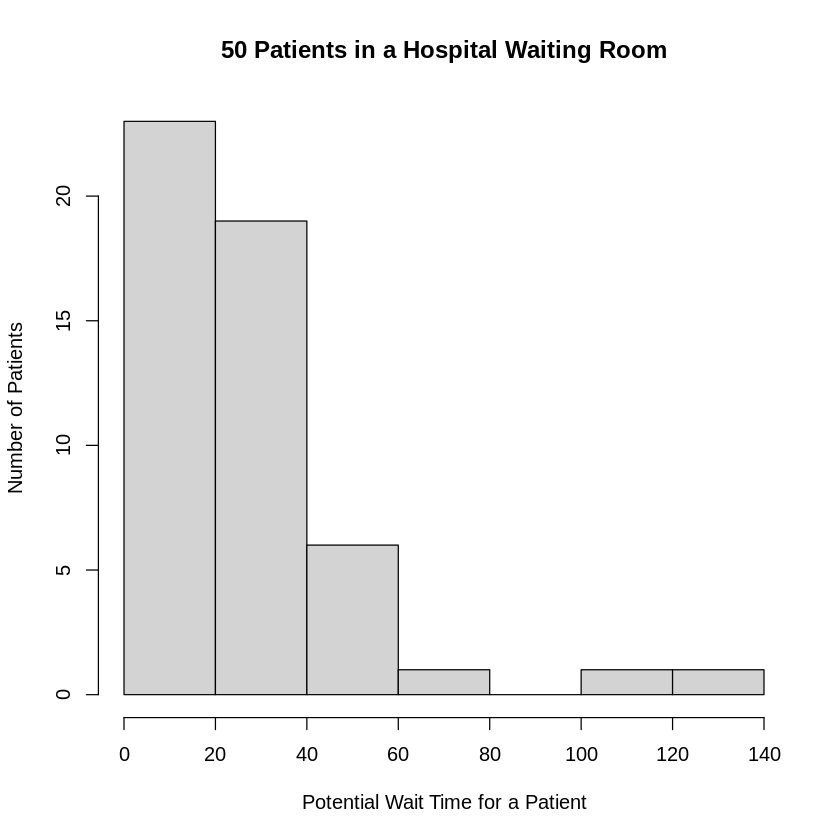

In [6]:
x <- 0:50
waitTimes <- rexp(x,rate = 1/30)
hist(waitTimes, main = '50 Patients in a Hospital Waiting Room', ylab = 'Number of Patients' ,xlab = 'Potential Wait Time for a Patient')

cat('The probability that the next person waits less than 10 minutes is: ',pexp(10,1/30))

cat('\nThe mean wait time from the simulation is: ',mean(waitTimes))

times <- 0:10000
p <- dexp(times, 1/30)
#expected time
Ext <- sum(times*p)

cat('\nThe expected wait time calculated from the pdf is: ',Ext)

cat('\nThe probability of waiting more than 1h is',1-pexp(60,1/30))

# Ex 3

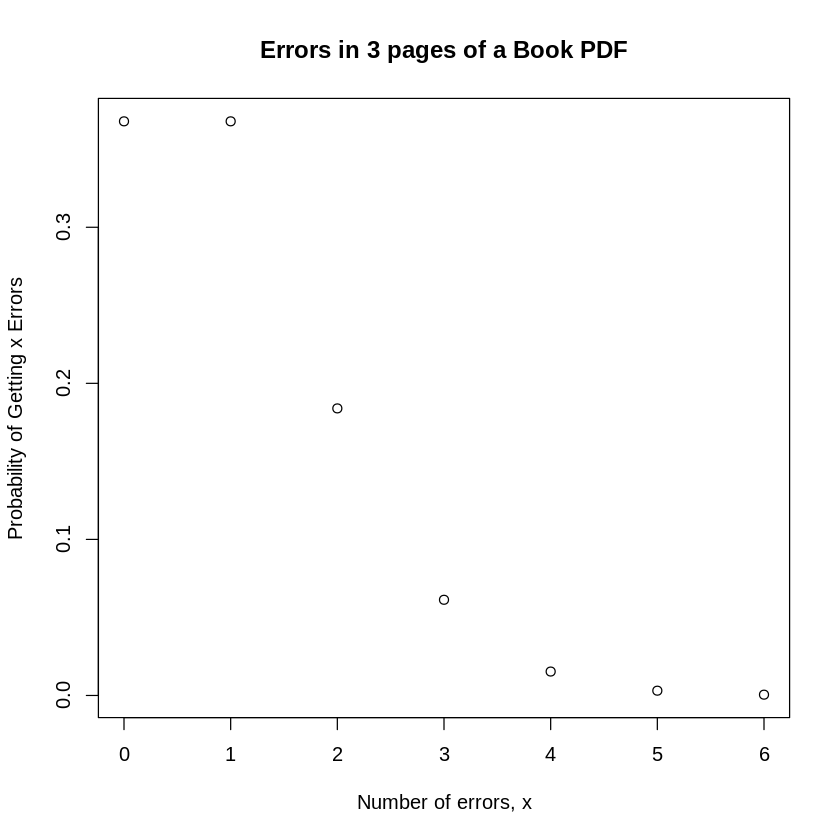

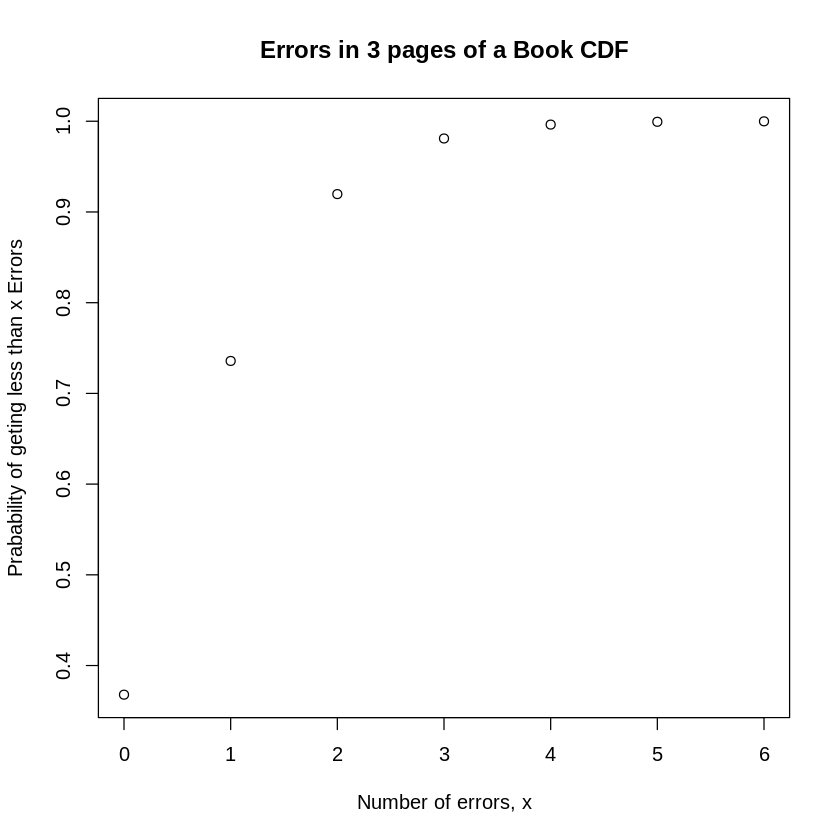

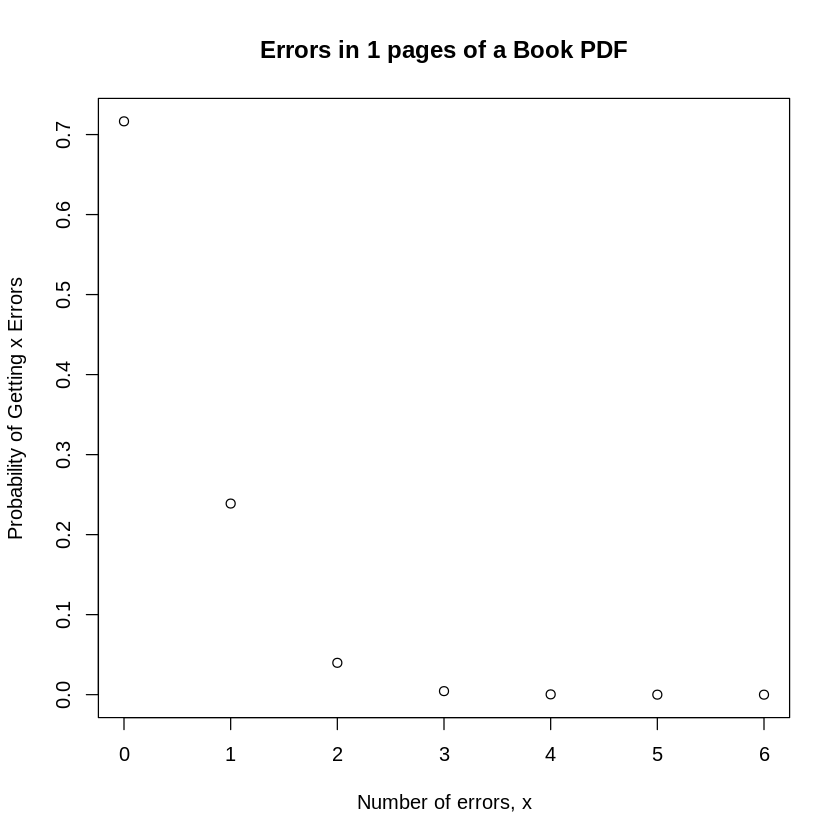



The probability that there is at least one error on a page of the book is:  0.2834687

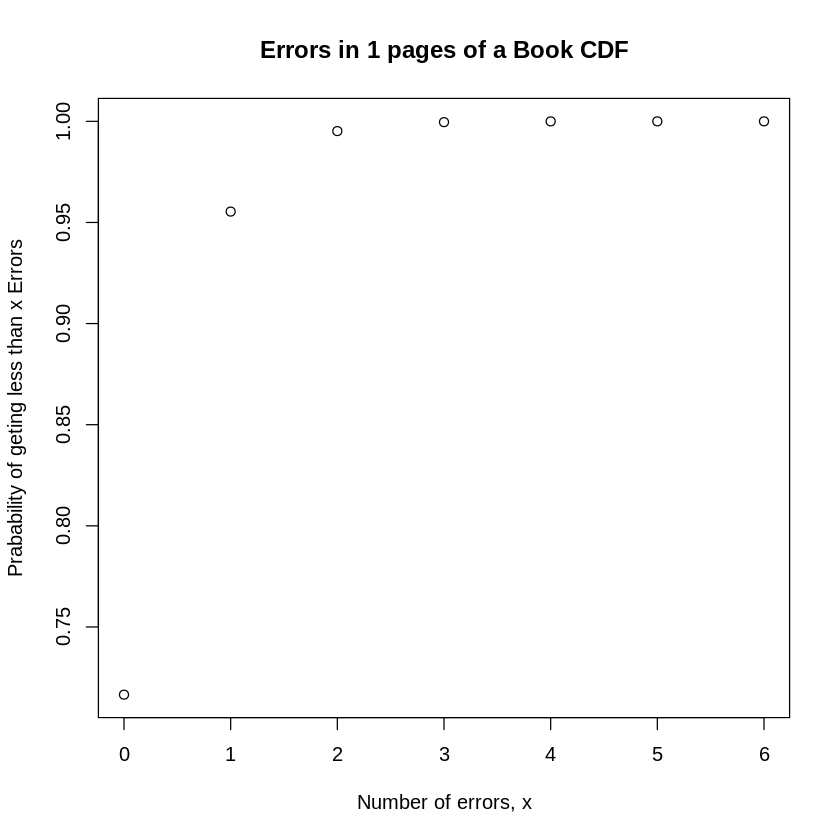

In [4]:
lambda = 1 #It is expected that there is 1 error in 3 pages 

errorsIn3Pages <- 0:6
error_pdf <- dpois(errorsIn3Pages, lambda = 1)
error_cdf <- ppois(errorsIn3Pages, lambda = 1)

plot(errorsIn3Pages, error_pdf, main = 'Errors in 3 pages of a Book PDF', xlab = 'Number of errors, x',ylab = 'Probability of Getting x Errors')
plot(errorsIn3Pages, error_cdf, main = 'Errors in 3 pages of a Book CDF', xlab = 'Number of errors, x', ylab = 'Prabability of geting less than x Errors')


# if the time scale is brought down to 1 page.
lambda = 1/3 # it is expected that there is 1/3 errors in 1 page.
errorsIn1Page <- 0:6
error_pdf <- dpois(errorsIn1Page, lambda = 1/3)
error_cdf <- ppois(errorsIn1Page, lambda = 1/3)

plot(errorsIn1Page, error_pdf, main = 'Errors in 1 pages of a Book PDF', xlab = 'Number of errors, x',ylab = 'Probability of Getting x Errors')
plot(errorsIn1Page, error_cdf, main = 'Errors in 1 pages of a Book CDF', xlab = 'Number of errors, x', ylab = 'Prabability of geting less than x Errors')

##Get help for this part
cat('\n\nThe probability that there is at least one error on a page of the book is: ', 1-ppois(0,1/3))#1-P(X<=0) = P(X>0) = P(X>=1)

# Ex 4

X = failures before 1 success
Getting an ace is a success
We want at least 10 cards drawn before one of them is and ace. This is 9 failures or more and 1 success.
So we want the P(X>=9)  
The cdf of 9 shows $$P(X \leq 9),\phantom{whitespace} 1-P(X\leq9) = P(X>9)$$  
We want the cdf of 8, $$P(X \leq 8),\phantom{whitespace} 1-P(X\leq8) = P(X>8) = P(X\geq9)$$

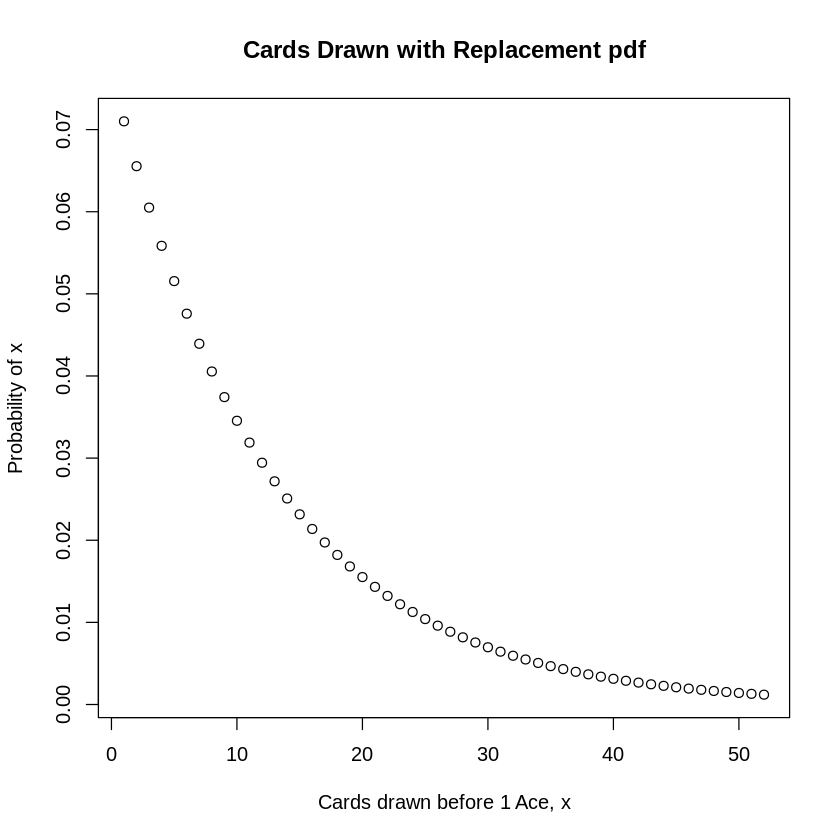

The probability that at least 10 draws are needed so that an ace is drawn:  0.4865652

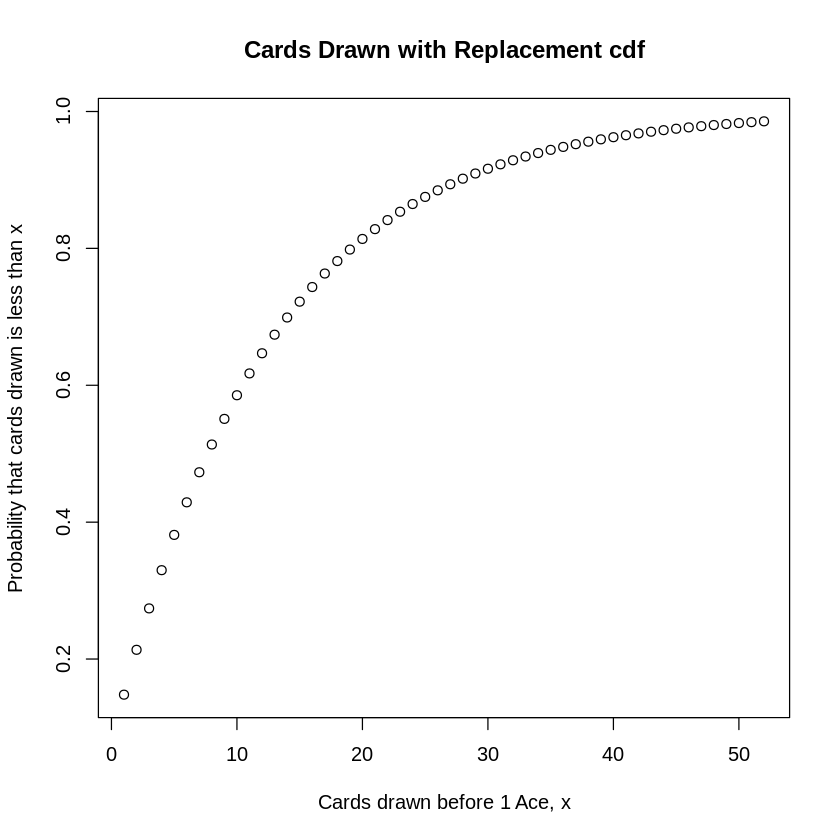

In [42]:
# deck of cards, random draw with replacement. Keep drawing untill one ace is drawn. 
#for this we use the negative binomial distribution.
#sucess is drawing an ace
#failure is not drawing an ace


#nbinome finds the probability for the number of sucesses before a target number of failures

pSucess = 4/52 #in each independant event
targetSucesses = 1
failBefSucc <- 1:52

sucBefFail_pdf = dnbinom(failBefSucc,targetSucesses,pSucess)
sucBefFail_cdf = pnbinom(failBefSucc,targetSucesses,pSucess)


plot(sucBefFail_pdf,main = 'Cards Drawn with Replacement pdf', xlab = 'Cards drawn before 1 Ace, x', ylab = 'Probability of x')
plot(sucBefFail_cdf,main = 'Cards Drawn with Replacement cdf', xlab = 'Cards drawn before 1 Ace, x', ylab = 'Probability that cards drawn is less than x')

cat('The probability that at least 10 draws are needed so that an ace is drawn: ', 1-pnbinom(8,1,4/52))

# Ex5

$$\int_1^2 (t − 1)(2 − t) \, dt = \int_0^1 (2t-t^2-2+t)dt= \left[t^2-\frac{t^3}{3}-2t+\frac{t^2}{2}\right]_1^2 = \frac{1}{6}$$

Therefore c = 6

$$cdf = t^2-\frac{t^3}{3}-2t+\frac{t^2}{2} + 5$$



Using the r integrate() function, the normalisation constant c required to make the total area 1 is:  6[1] 101
[1] 101


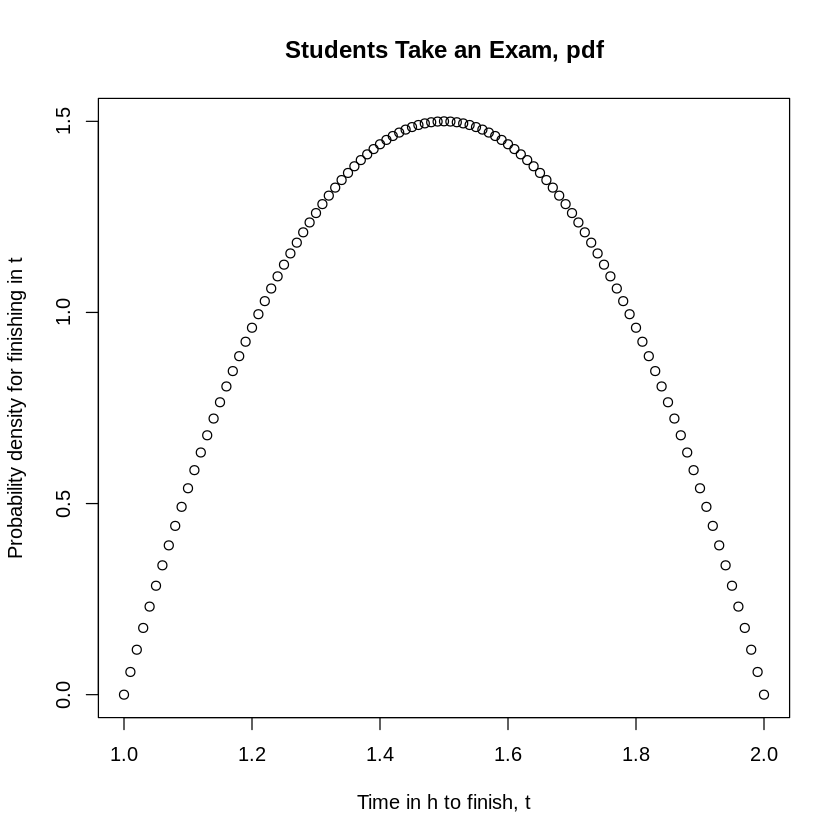

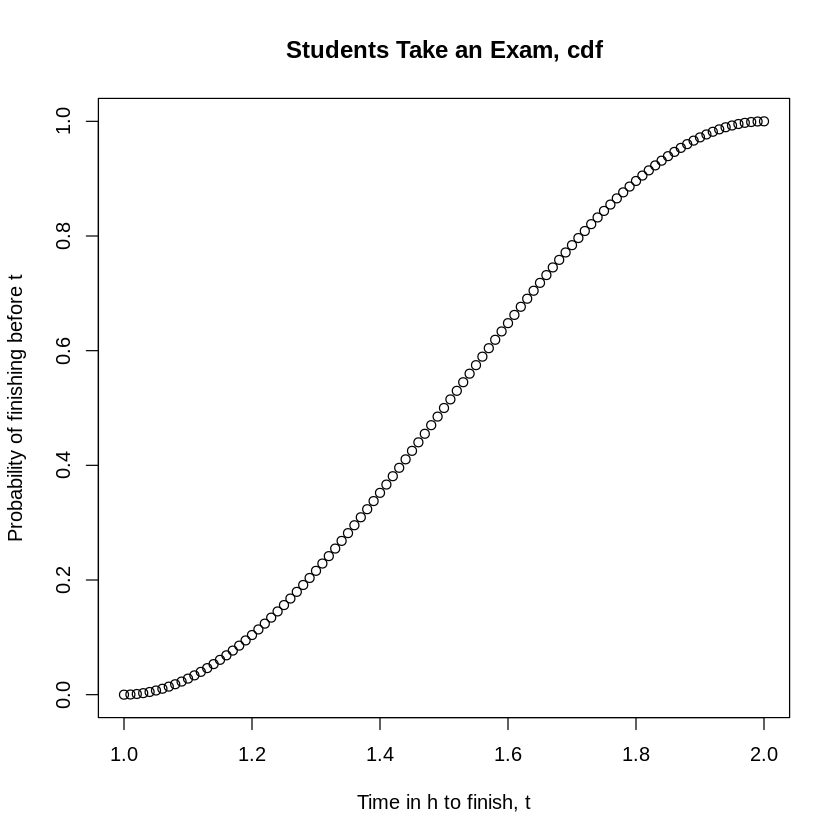

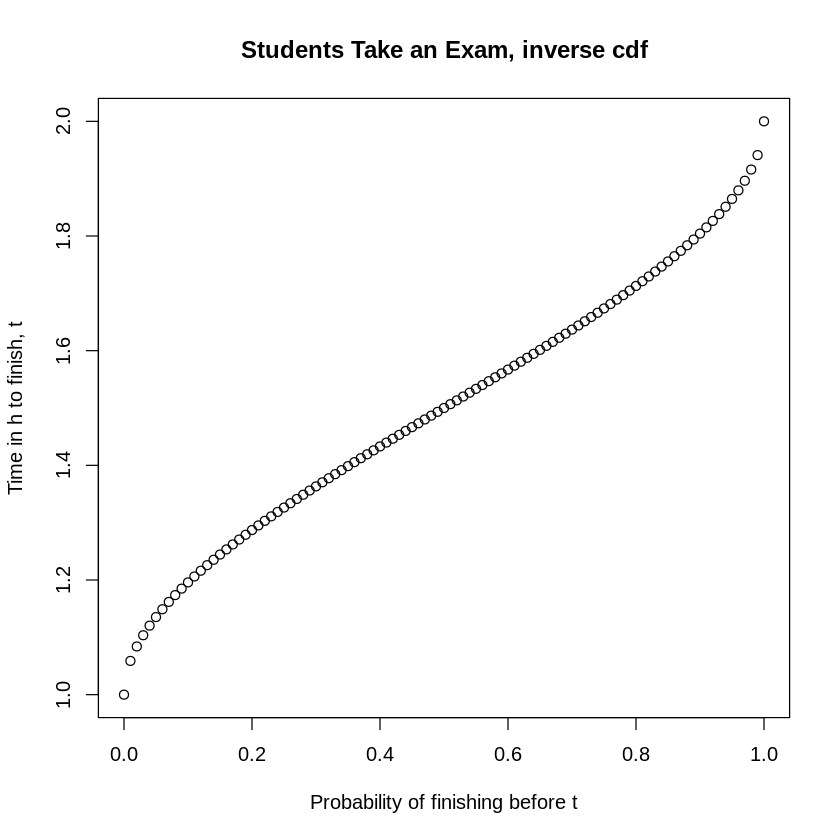

ERROR: Error in pfun(hour, dfun): unused argument (dfun)


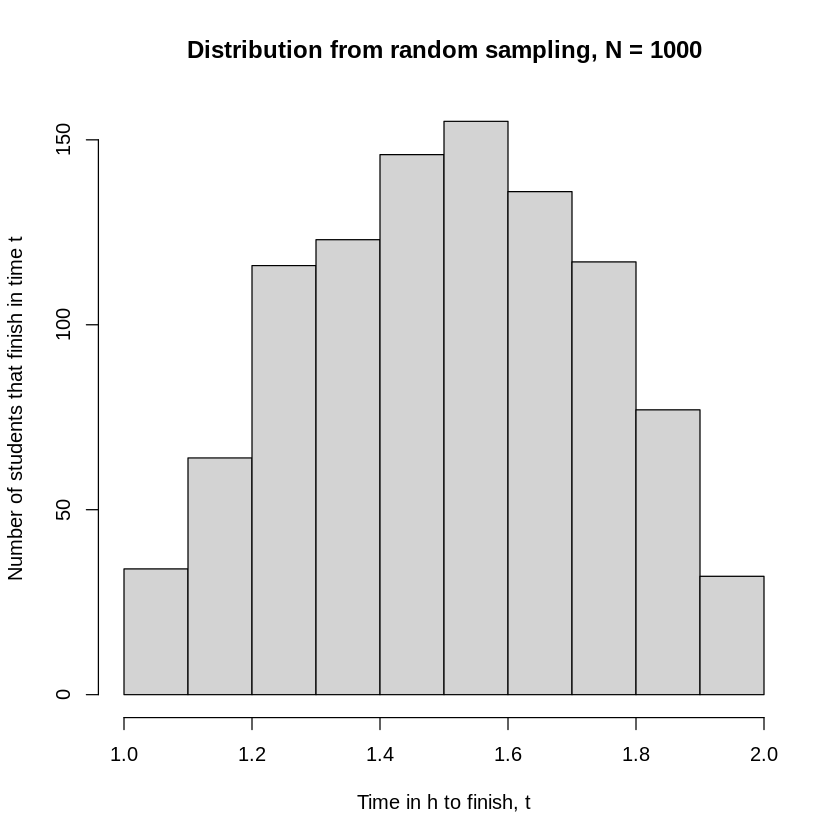

In [31]:
#probability a student is able to finish in time t
cuberoot = function(x){
    if(x < 0)
    { - (-x)^(1/3)}
    else
    {x^(1/3)}
    }


fun <- function(t){
    c <- 1
    return(c*(t-1)*(2-t))
}
area <- integrate(fun, lower = 1, upper = 2)
c <- 1/area$value
cat('Using the r integrate() function, the normalisation constant c required to make the total area 1 is: ' ,c)

#probability density function with normalisation constant c
dfun <- function(t){
    c<-6
    return(c*(t-1)*(2-t))
}

#cdf function is the integral function of the pdf plus some constant (5) that ensures it ranges from 0 to 1. 
pfun <- function(t){
    cdf <- 6*(3*t**2/2 - t**3/3 - 2*t)+5
    return(cdf)
}

#inverse cdf using the uniroot function for the cubic cdf in the range of interest
qfun <- function(cdfVal){
    invcdf <- vector()
    for (val in cdfVal){
        cdfroot <- function(t){return (6*(3*t**2/2 - t**3/3 - 2*t)+5-val)} 
        root <- uniroot(cdfroot, lower = 1, upper = 2)
        invcdf <- c(invcdf,root$root)
    }
    return(invcdf)
}

#random number generation via inverse cdf method
rfun <- function(n,qfun){
    rand <- runif(n)
    return(qfun(rand))
}

times <- seq(1,2,0.01)
r <- seq(0,1,0.01)

pdf <- dfun(times)
cdf <- pfun(times)
invcdf <- qfun(r)
data <- rfun2(1000,qfun)

plot(times ,pdf, main = 'Students Take an Exam, pdf', xlab = 'Time in h to finish, t', ylab = 'Probability density for finishing in t')
plot(times, cdf, main = 'Students Take an Exam, cdf', xlab = 'Time in h to finish, t', ylab = 'Probability of finishing before t')
plot(r,invcdf, main = 'Students Take an Exam, inverse cdf', ylab = 'Time in h to finish, t', xlab = 'Probability of finishing before t')
hist(data, main = "Distribution from random sampling, N = 1000", xlab = 'Time in h to finish, t', ylab = 'Number of students that finish in time t')

hour <- 75/60
sevenFive <- 1 - pfun(hour,dfun)
cat("The probability that a student takes longer than 75min is", sevenFive)

low <- 90/60
high <-120/60

between <- pfun(high,dfun) - pfun(low,dfun)
cat("\n\nThe probability that a student takes between 90 and 120min is", between)



## Ex 6

The integral of the function across its range is:  1

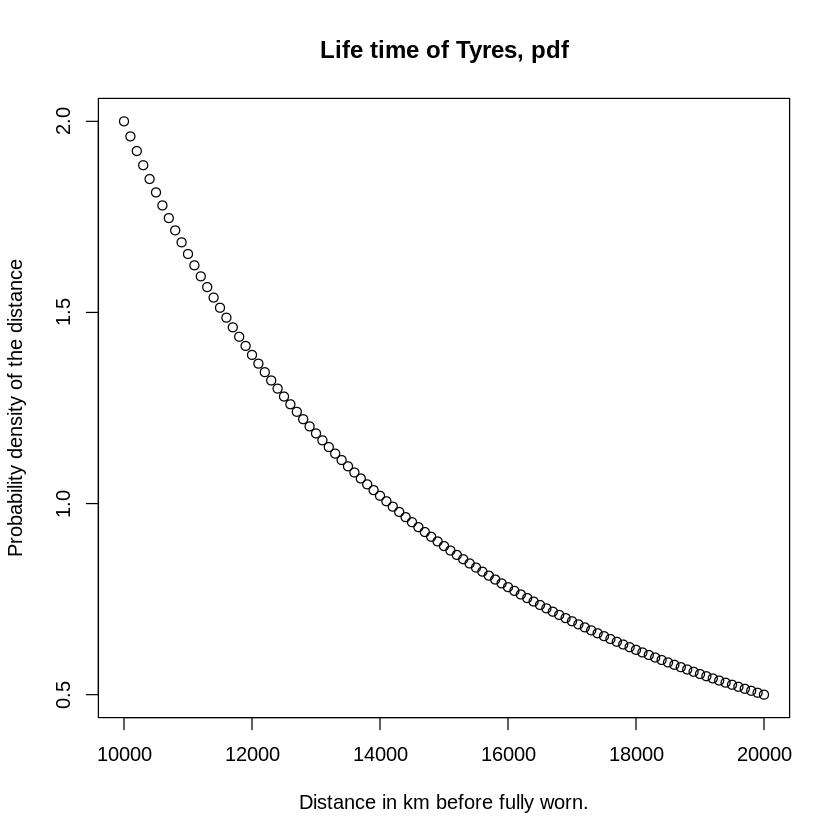

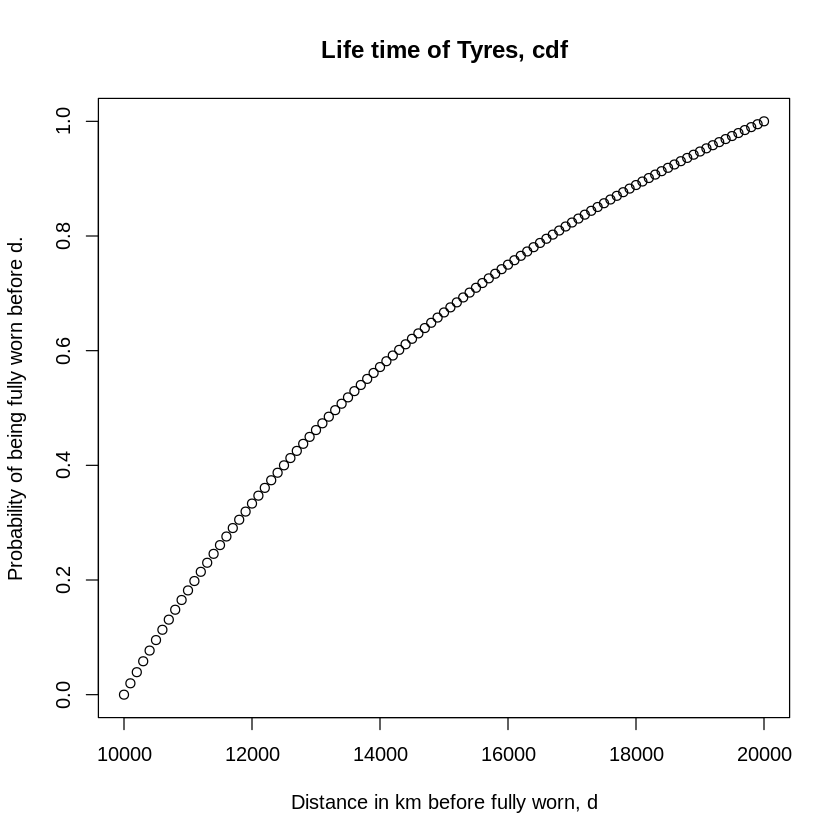

The probability that the tires will last less than 15000km is 0.6666667

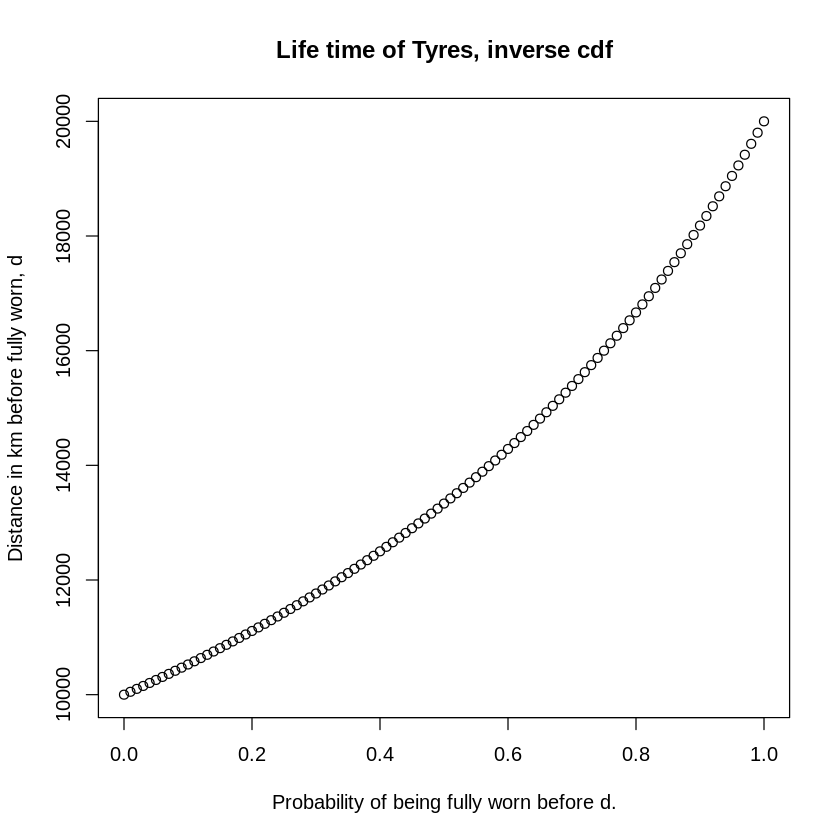

The analytical expected full wear distance is:  13862.94
The expected full wear distance cacluated from the data is : 13881.38 km
The variance cacluated from the data is : 7790747 km

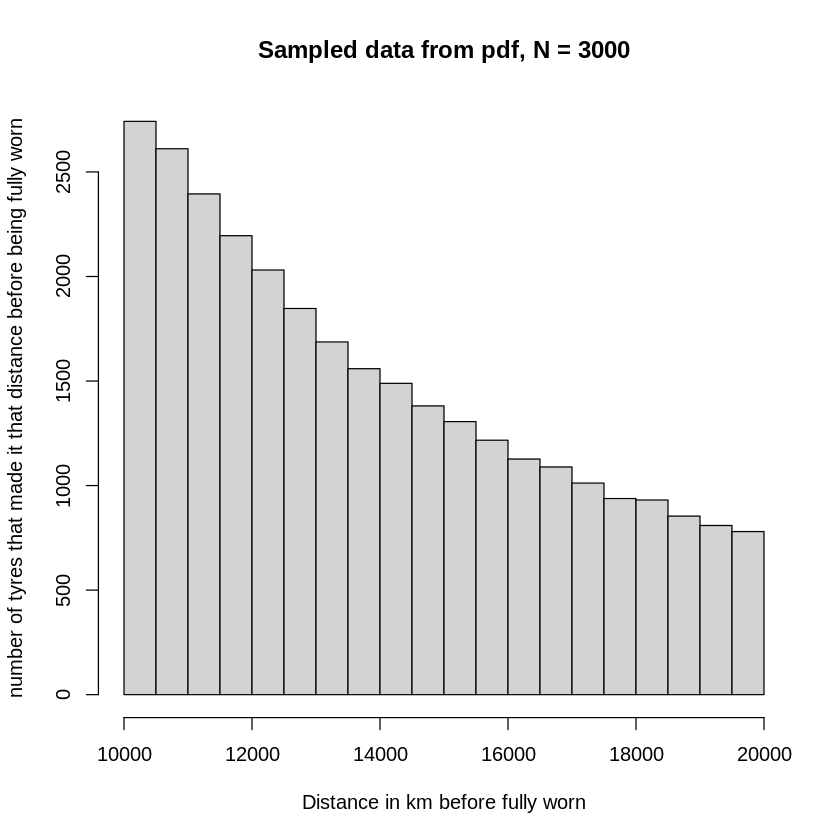

In [26]:
fun <- function(x){
    return(2/(x**2))
}

#the integral of the function in the range is 1, so it is already the pdf
cat("The integral of the function across its range is: ",integrate(fun,lower = 1, upper = 2)$value)

x <- seq(1,2,0.01)
plot(x*1e+04,fun(x), main = 'Life time of Tyres, pdf', xlab = 'Distance in km before fully worn.', ylab = 'Probability density of the distance')

pfun <- function(x){
    return((-2/x)+2)
}

plot(x*1e+04,pfun(x), main = 'Life time of Tyres, cdf', xlab = 'Distance in km before fully worn, d', ylab = 'Probability of being fully worn before d.')

qfun <- function(cdfVal){
    return(2/(2-cdfVal))
}

cdfVal <- seq(0,1,0.01)
plot(cdfVal,qfun(cdfVal)*1e+04, main = 'Life time of Tyres, inverse cdf', ylab = 'Distance in km before fully worn, d', xlab = 'Probability of being fully worn before d.')

x1 <- 15000/1e+04
cat("The probability that the tires will last less than 15000km is",pfun(x1))

rfun <- function(n){
    rand <- runif(n)
    return(qfun(rand))
}


data <- rfun(30000)
hist <- hist(data*1e+04, main = 'Sampled data from pdf, N = 3000', xlab = 'Distance in km before fully worn', ylab = 'number of tyres that made it that distance before being fully worn')

# Analytical expectation
xPx <- function(x){
    return(2/x)
}
expectation <- integrate(xPx, lower = 1, upper = 2)
cat("The analytical expected full wear distance is: ",expectation$value*1e+04)

# Data Expectation
binwidth <- hist$mids[2] - hist$mids[1]
counts <- hist$counts
x <- hist$mids
Px <- counts/sum(counts)

x2 <- x**2

cat("\nThe expected full wear distance cacluated from the data is :", sum(x*Px),"km")
cat("\nThe variance cacluated from the data is :",sum(x2*Px)-sum(x*Px)**2,"km")